**links**
https://colab.research.google.com/drive/1a4QqRo5welGACZOn37jSYuITnpiBR42S#scrollTo=Ows_djznHEUN
https://github.com/nathanhyq/Identification-of-Avila-Bible-copyist/blob/master/code.py

# **Projeto Aprendizagem de Máquina**

### Membros

* André Ferreira
* João Vítor Valadares
* Robson Oliveira

In [ ]:
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/file/d/1a4tbajfGPgJ3UggePEKrc3gIBp8VcZJ1/view?usp=sharing' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1a4tbajfGPgJ3UggePEKrc3gIBp8VcZJ1" -O teste.txt && rm -rf /tmp/cookies.txt
# https://drive.google.com/file/d/1a4tbajfGPgJ3UggePEKrc3gIBp8VcZJ1/view?usp=sharing TESTE

teste.txt           100%[===================>] 976.51K  --.-KB/s    in 0.01s   


In [ ]:
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/file/d/176nbSFDNs_SSGeCgAPZA5Ksnyhphj5bh/view?usp=sharing' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=176nbSFDNs_SSGeCgAPZA5Ksnyhphj5bh" -O treino.txt && rm -rf /tmp/cookies.txt

# https://drive.google.com/file/d/176nbSFDNs_SSGeCgAPZA5Ksnyhphj5bh/view?usp=sharing TREINAMENTO

treino.txt          100%[===================>] 975.90K  --.-KB/s    in 0.02s   


In [ ]:
!pip install plotly 

In [ ]:
use_plotly = True

Alguns imports que utilizaremos no decorrer de nossa análise.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from plotly import figure_factory as ff
from plotly.subplots import make_subplots
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier




if use_plotly:
    import plotly.graph_objects as go
    import plotly.express as px

# **Atributos do Dataset**

## **Descrição dos atributos**

####**Page level features**:
intercolumnar distance: distância entre duas colunas de uma pagina

1.   **upper margin**: distância entre a margem superior da página e a primeira linha de texto
2.   **lower margin**: distância entre a margem inferior da página e a última linha de texto

####**Column level features**:
1.   **exploitation**: fração da coluna preenchida com tinta. Formalmente computada como NBP(C)/NP(C), onde NBP(C) e NP(C) são o número de pixels pretos e o número total de pixels na coluna atual, respectivamente
2.   **row number**: número de linhas na coluna atual


####**Row level features**:

1.   **modular ratio**: estimativa da dimensão do caractere escrito à mão
2.   **interlinear spacing**: distância entre duas linhas, em pixels
3. **weight**: fração da linha preenchida com tinta. Análogo à explotation, mas para uma única linha
4. **peak number**: estimativa do número de caracteres em uma linha
5. **modular ratio/ interlinear spacing**: proporção dos dois atributos precedentes

Todos os atributos são quantitativos, ou seja numéricos. A variável alvo é chamada de "monk"; é o único atributo qualitativo do dataset. 

In [ ]:
names = [
  'intercolumnar distance',
  'upper margin',
  'lower margin',
  'exploitation',
  'row number',
  'modular ratio',
  'interlinear spacing',
  'weight',
  'peak number',
  'modular ratio/ interlinear spacing',
  'monk'
]

avila_tr = pd.read_csv("treino.txt", names=names)
avila_ts = pd.read_csv("teste.txt", names=names)

Printando o tamanho de nosso dataset para checar se está tudo ok

In [ ]:
print(f"Training size: {len(avila_tr)}")
print(f"Testing size: {len(avila_ts)}")
print(f'Dataset columns: {avila_tr.shape[1]}')

Training size: 10430
Testing size: 10437
Dataset columns: 11


In [ ]:
avila_tr.head()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing,monk
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


# Explorando o dataset
Inicialmente iremos explorar os dados de nosso dataset para entender como ele é divido. Primeiro iremos checar se ele possui algum valor nulo e depois a sua distribuição de classes.

In [ ]:
print('Valores nulos por atributo:')
print(np.sum(avila_tr.isna()))

Valores nulos por atributo:
intercolumnar distance                0
upper margin                          0
lower margin                          0
exploitation                          0
row number                            0
modular ratio                         0
interlinear spacing                   0
weight                                0
peak number                           0
modular ratio/ interlinear spacing    0
monk                                  0
dtype: int64


Vemos então que o dataset não possui nenhum valor nulo.


In [ ]:
avila_tr['monk'] = avila_tr['monk'].astype('category')
avila_ts['monk'] = avila_ts['monk'].astype('category')

if use_plotly:
    class_bar = px.bar(avila_tr['monk'].value_counts(),
           x=avila_tr['monk'].value_counts().index,
           y=avila_tr['monk'].value_counts(),
           color=avila_tr['monk'].value_counts().index,
           text=avila_tr['monk'].value_counts(),
           color_discrete_sequence = px.colors.qualitative.Antique,
           title= ('Ocorrências de cada classe'),
           width=1000, height=400,
          )

    class_bar.update_layout(showlegend=False, xaxis_title='Monk', yaxis_title='Ocorrências',  margin=dict(t=50, b=25, r=20), hovermode=False)
    class_bar.update_traces(textposition='outside')
    class_bar.show()

Vemos aqui então que o nosso dataset claramente não tem suas classes balanceadas


De acordo com a descrição do nosso dataset, os dados já estão padronizados quanto ao seu desvio. Mas vamos fazer um double-check apenas para ter certeza:

In [ ]:
avila_tr.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000,10430.000000
mean,0.000852,0.033611,-0.000525,-0.002387,0.006370,0.013973,0.005605,0.010323,0.012914,0.000818
std,0.991431,3.920868,1.120202,1.008527,0.992053,1.126245,1.313754,1.003507,1.087665,1.007094
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.541991,-0.372457,-0.516097
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111803,0.064084,-0.034513
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654944,0.500624,0.530855
max,11.819916,386.000000,50.000000,3.987152,1.066121,53.000000,83.000000,13.173081,44.000000,4.671232


Vemos que nem todos atributos realmente estão padronizados, como temos atributos com desvio padrão acima de 1 se destacando principalmente:


*   Upper margin
*   Lower margin
*   Modular ratio
*   Interlinear spacing

Iremos então analisar o atributo "upper margin" e ver se temos algum ponto que distoa dos outros (conhecidos como outliers):



In [ ]:
def single_boxplot(df, colname) -> None:
  box = px.box(x=df[colname], orientation='h', height=200, color_discrete_sequence = px.colors.qualitative.Antique)
  box.update_layout(xaxis_title=colname, margin=dict(t=10, b=10, r=10, l=10), hovermode=False)
  box.show()

if use_plotly:
    single_boxplot(avila_tr, 'upper margin')

Vemos aqui então que um único ponto claramente anômolo no nosso dataset, ele está muito distante da mediana de nossos dados, sendo assim iremos removê-lo.

In [ ]:
new_std = avila_tr['upper margin'][avila_tr['upper margin'] < 50].std()
print(f"Desvio padrão do atributo 'upper margin' com outlier removido: {new_std:.3}")
avila_tr = avila_tr[avila_tr['upper margin'] < 50]

Desvio padrão do atributo 'upper margin' com outlier removido: 1.04


Por mais que ainda esteja acima de 1, agora é um valor razoável e podemos continuar com nosso desenvolvimento.

Vamos checar novamente apenas para confirmar:

In [ ]:
avila_tr.describe()

,intercolumnar distance,upper margin,lower margin,exploitation,row number,modular ratio,interlinear spacing,weight,peak number,modular ratio/ interlinear spacing
count,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000,10429.000000
mean,0.000853,-0.003398,-0.005320,-0.002403,0.006370,0.008892,-0.002353,0.010297,0.008696,0.000757
std,0.991479,1.042944,1.007574,1.008574,0.992101,0.999647,1.032239,1.003552,0.998783,1.007123
min,-3.498799,-2.426761,-3.210528,-5.440122,-4.922215,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-0.128929,-0.259834,0.064919,-0.528002,0.172340,-0.598658,-0.044076,-0.542001,-0.372457,-0.516103
50%,0.043885,-0.055704,0.217845,0.095763,0.261718,-0.058835,0.220177,0.111754,0.064084,-0.034621
75%,0.204355,0.203385,0.352988,0.658210,0.261718,0.564038,0.446679,0.654959,0.500624,0.530764
max,11.819916,43.133656,7.458681,3.987152,1.066121,5.505495,10.714792,13.173081,3.244594,4.671232


Iremos agora dar uma olhada melhor na distribuição dos dados em todos os atributos de nosso dataset, visto que é importante entendermos com o que estamos trabalhando.

In [ ]:
def dataset_box_by_feature(ds) -> None:
  tot_fig = go.Figure()
  for column in ds.columns:
    tot_fig.add_trace(
        go.Box(
          y=ds[column],
          name=column,
      )
    )

  tot_fig.update_layout(
      margin=dict(
          l=20,
          r=20,
          b=20,
          t=50,
          pad=0
      ),
      title={'text': f'Attributes of the dataset ({len(ds)} samples)', 'x': 0.5, 'xanchor': 'center'},
      showlegend=False
  )
  tot_fig.show()

In [ ]:
if use_plotly:
  dataset_box_by_feature(avila_tr)

É possível observar que temos dados em todos, ou quase todos, atributos que podem ser considerados distantes do geral, porém destacando o atributo upper margin. 

No entanto, iremos manter os dados da forma que estão, tendo retirado apenas o outlier anterior que estava MUITO afastado de todo o resto e fazia com que o desvio padrão fosse elevado.

# Matriz de correlação
Além disso, vamos utilizar uma matriz de correlação para checar quais atributos possuem relação com outro, se existe alguma relação linear:

In [ ]:
corr_ma = avila_tr.corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



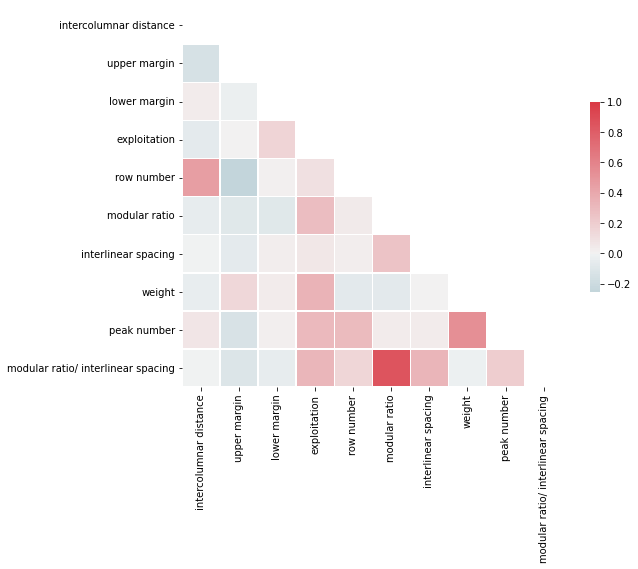

In [ ]:
mask = np.zeros_like(corr_ma, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_ma, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Vemos aqui que além da relação entre **modular ratio** e **modular ratio/interlinear spacing**, não temos atributos que possuem correlação alta entre si. 

E isso é algo esperado, visto que o último é apenas o primeiro dividido por **interlinear spacing**.


# Balanceamento do Dataset
Sabendo que o dataset não está balanceado, para utilizarmos tanto o conjunto de treino quanto o de teste com mais precisão, temos que balanceá-lo.

Class=0, n=4285 (8.333%)
Class=5, n=4285 (8.333%)
Class=7, n=4285 (8.333%)
Class=4, n=4285 (8.333%)
Class=8, n=4285 (8.333%)
Class=11, n=4285 (8.333%)
Class=3, n=4285 (8.333%)
Class=10, n=4285 (8.333%)
Class=6, n=4285 (8.333%)
Class=9, n=4285 (8.333%)
Class=2, n=4285 (8.333%)
Class=1, n=4285 (8.333%)


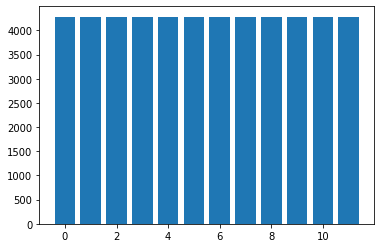

In [ ]:
#training
training_data = avila_tr.values
X_train, y_train = training_data[:, :-1], training_data[:, -1]
y_train = LabelEncoder().fit_transform(y_train)
oversample = SMOTE(k_neighbors=4)
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()


Agora, com os datasets balanceados, podemos fazer o treino e teste.

# Decision Tree Classifier

As árvores de decisão são um método de aprendizado supervisionado não-paramétrico que esta sendo usado, nessa atividade, para a tarefa de classificação. O módulo do sklearn além de todo o auxílio no desenvolvimento, oferece alguns suportes automáticos como o pruning da árvore.
<br />


Pontos Positivos | Pontos Negativos
:-:|:-:
Requer pouca preparação de dados  |  As árvores são muito sensíveis a mudança nos dados. Uma pequena<br /> pode resultar em uma árvore completamente diferente.
É menos custoso, logarítmico no número de pontos de dados <br /> usados no treinamento  |  As árvores de decisão em datasets não balanceados são muito<br /> tendenciosas às classes mais presentes
Lida bem com valores numéricos e categóricos | Novos pesquisadores possuem bastante dificuldade em gerar<br /> arvores simples que generalizam bem o problema 
Tem bons resultados em problemas não-lineares


In [ ]:
test_data = avila_ts.values
x_test, y_test = test_data[:, :-1], test_data[:, -1]
y_test = LabelEncoder().fit_transform(y_test)

In [ ]:
# Definição do classificador e seus hiperparâmetros default
decision_tree_classifier = DecisionTreeClassifier(criterion='entropy',max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [ ]:
# Treinando o modelo
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

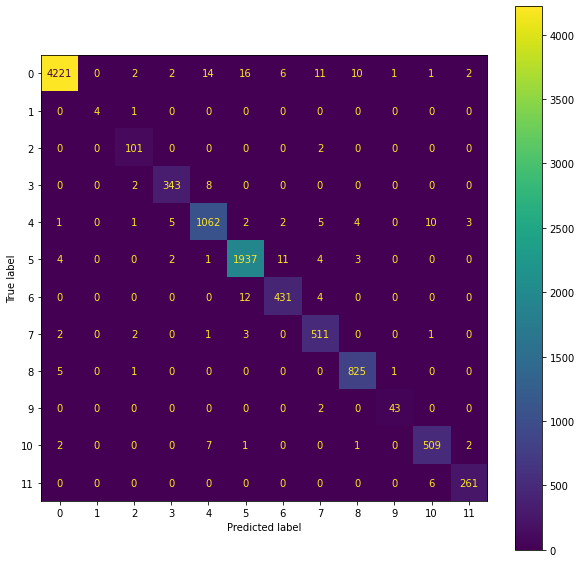

In [ ]:
# Guardando os resultados da predição usando o conjunto de teste
decision_tree_prediction = decision_tree_classifier.predict(x_test)
# Plotagem da matriz de confusão
cm = confusion_matrix(y_test, decision_tree_prediction, labels=decision_tree_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_classifier.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

A Matriz de confusão mostra um ótimo resultado (quanto maior as valorações na diagonal principal da matriz, melhor). O que representa que o modelo tem conseguido acertar bem as predições. 

In [ ]:
target_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']
print(classification_report(y_test, decision_tree_prediction, target_names=target_names))

              precision    recall  f1-score   support

           A       1.00      0.98      0.99      4286
           B       1.00      0.80      0.89         5
           C       0.92      0.98      0.95       103
           D       0.97      0.97      0.97       353
           E       0.97      0.97      0.97      1095
           F       0.98      0.99      0.98      1962
           G       0.96      0.96      0.96       447
           H       0.95      0.98      0.97       520
           I       0.98      0.99      0.99       832
           W       0.96      0.96      0.96        45
           X       0.97      0.98      0.97       522
           Y       0.97      0.98      0.98       267

    accuracy                           0.98     10437
   macro avg       0.97      0.96      0.96     10437
weighted avg       0.98      0.98      0.98     10437



As árvores de decisão são modelos que conseguem lidar bem com problemas de várias saídas e dados numéricos. Além disso, é fundamental para lidar com problemas não-lineares que é o caso. Portanto, isso justifica o melhor desempenho do modelo.

## Segundo teste
Fazendo o primeiro teste limitando a profundidade da arvore e o número de features à sua raiz.

In [ ]:
decision_tree_classifier2 = DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features='auto')

In [ ]:
decision_tree_classifier2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, max_features='auto')

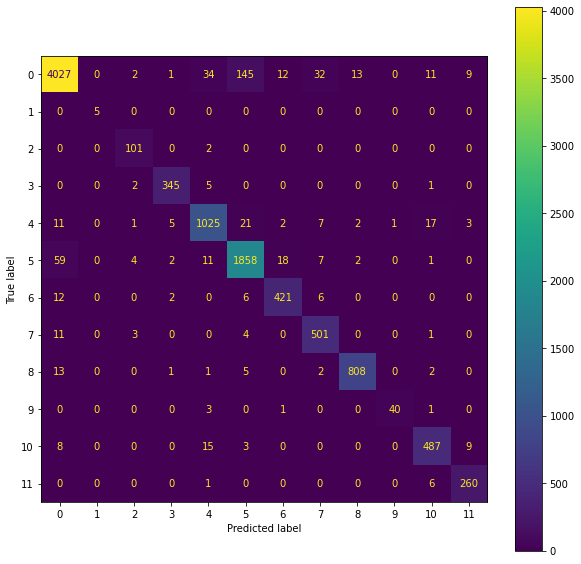

In [ ]:
# Guardando os resultados da predição usando o conjunto de teste
decision_tree_prediction2 = decision_tree_classifier2.predict(x_test)
# Plotagem da matriz de confusão
cm = confusion_matrix(y_test, decision_tree_prediction2, labels=decision_tree_classifier2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_classifier2.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']
print(classification_report(y_test, decision_tree_prediction2, target_names=target_names))

              precision    recall  f1-score   support

           A       0.97      0.94      0.96      4286
           B       1.00      1.00      1.00         5
           C       0.89      0.98      0.94       103
           D       0.97      0.98      0.97       353
           E       0.93      0.94      0.94      1095
           F       0.91      0.95      0.93      1962
           G       0.93      0.94      0.93       447
           H       0.90      0.96      0.93       520
           I       0.98      0.97      0.98       832
           W       0.98      0.89      0.93        45
           X       0.92      0.93      0.93       522
           Y       0.93      0.97      0.95       267

    accuracy                           0.95     10437
   macro avg       0.94      0.95      0.95     10437
weighted avg       0.95      0.95      0.95     10437



## Terceiro teste
Como tivemos uma piora, removemos o limite de profundidade e mudamos o criterion

In [ ]:
decision_tree_classifier3 = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features=None)

In [ ]:
decision_tree_classifier3.fit(X_train, y_train)

DecisionTreeClassifier()

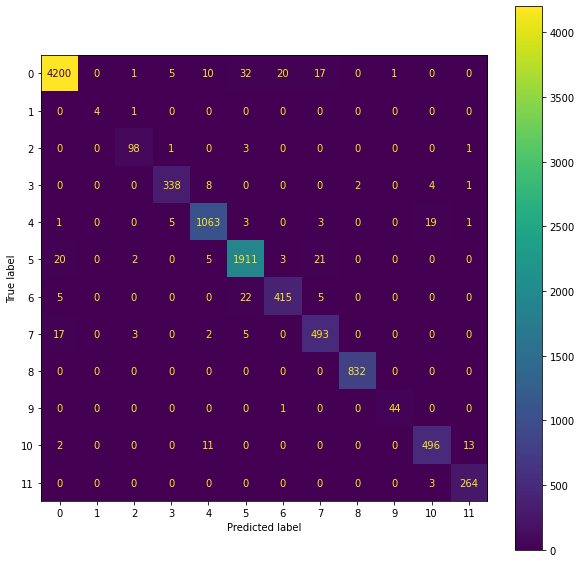

In [ ]:
# Guardando os resultados da predição usando o conjunto de teste
decision_tree_prediction3 = decision_tree_classifier3.predict(x_test)
# Plotagem da matriz de confusão
cm = confusion_matrix(y_test, decision_tree_prediction3, labels=decision_tree_classifier3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree_classifier3.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']
print(classification_report(y_test, decision_tree_prediction3, target_names=target_names))

              precision    recall  f1-score   support

           A       0.99      0.98      0.98      4286
           B       1.00      0.80      0.89         5
           C       0.93      0.95      0.94       103
           D       0.97      0.96      0.96       353
           E       0.97      0.97      0.97      1095
           F       0.97      0.97      0.97      1962
           G       0.95      0.93      0.94       447
           H       0.91      0.95      0.93       520
           I       1.00      1.00      1.00       832
           W       0.98      0.98      0.98        45
           X       0.95      0.95      0.95       522
           Y       0.94      0.99      0.97       267

    accuracy                           0.97     10437
   macro avg       0.96      0.95      0.96     10437
weighted avg       0.97      0.97      0.97     10437



# K-Neighbors

Fazendo o primeiro teste com o KNN, utilizando 2 vizinhos e paramêtros default.

In [ ]:
target_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']

neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
predictions = neigh.predict(x_test)

print(classification_report(y_test, predictions, target_names=target_names))



              precision    recall  f1-score   support

           A       0.79      0.81      0.80      4286
           B       1.00      1.00      1.00         5
           C       0.50      0.70      0.58       103
           D       0.62      0.70      0.66       353
           E       0.75      0.71      0.73      1095
           F       0.68      0.62      0.65      1962
           G       0.58      0.68      0.63       447
           H       0.61      0.64      0.62       520
           I       0.98      0.95      0.97       832
           W       0.82      0.93      0.87        45
           X       0.90      0.86      0.88       522
           Y       0.82      0.81      0.82       267

    accuracy                           0.76     10437
   macro avg       0.76      0.78      0.77     10437
weighted avg       0.76      0.76      0.76     10437



Aumentando o número de vizinhos para 5, temos uma piora nos resultados.

In [ ]:
neigh2 = KNeighborsClassifier(n_neighbors=5)
neigh2.fit(X_train, y_train)
predictions = neigh2.predict(x_test)

print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           A       0.87      0.62      0.72      4286
           B       1.00      1.00      1.00         5
           C       0.41      0.73      0.52       103
           D       0.51      0.75      0.61       353
           E       0.70      0.72      0.71      1095
           F       0.59      0.72      0.65      1962
           G       0.46      0.76      0.58       447
           H       0.49      0.72      0.58       520
           I       0.98      0.95      0.96       832
           W       0.65      0.96      0.77        45
           X       0.87      0.87      0.87       522
           Y       0.77      0.83      0.80       267

    accuracy                           0.71     10437
   macro avg       0.69      0.80      0.73     10437
weighted avg       0.75      0.71      0.72     10437



Aumentando o número de vizinhos para 10, vemos outra piora no resultado.


In [ ]:
neigh3 = KNeighborsClassifier(n_neighbors=10)
neigh3.fit(X_train, y_train)
predictions = neigh3.predict(x_test)

print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           A       0.87      0.56      0.68      4286
           B       1.00      1.00      1.00         5
           C       0.30      0.75      0.42       103
           D       0.44      0.76      0.56       353
           E       0.68      0.68      0.68      1095
           F       0.59      0.68      0.63      1962
           G       0.41      0.79      0.54       447
           H       0.44      0.75      0.56       520
           I       0.96      0.95      0.95       832
           W       0.53      0.98      0.69        45
           X       0.87      0.87      0.87       522
           Y       0.75      0.85      0.80       267

    accuracy                           0.68     10437
   macro avg       0.65      0.80      0.70     10437
weighted avg       0.74      0.68      0.69     10437



Aumentando o número de vizinhos para 20, os resultados continuam piorando.

In [ ]:
neigh4 = KNeighborsClassifier(n_neighbors=20)
neigh4.fit(X_train, y_train)
predictions = neigh4.predict(x_test)

print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           A       0.88      0.46      0.60      4286
           B       1.00      1.00      1.00         5
           C       0.22      0.76      0.35       103
           D       0.36      0.77      0.49       353
           E       0.67      0.64      0.65      1095
           F       0.56      0.64      0.60      1962
           G       0.36      0.82      0.50       447
           H       0.41      0.77      0.53       520
           I       0.95      0.94      0.94       832
           W       0.31      0.98      0.47        45
           X       0.84      0.86      0.85       522
           Y       0.69      0.85      0.77       267

    accuracy                           0.63     10437
   macro avg       0.60      0.79      0.65     10437
weighted avg       0.72      0.63      0.64     10437



Modificando o algoritmo para brute force e utilizando 4 vizinhos, não vemos modificação no resultado com apenas 4 vizinhos.

In [ ]:
neigh5 = KNeighborsClassifier(n_neighbors=4,algorithm='brute')
neigh5.fit(X_train, y_train)
predictions = neigh5.predict(x_test)

print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           A       0.85      0.71      0.77      4286
           B       1.00      1.00      1.00         5
           C       0.43      0.74      0.54       103
           D       0.55      0.73      0.63       353
           E       0.73      0.72      0.72      1095
           F       0.63      0.67      0.65      1962
           G       0.50      0.74      0.60       447
           H       0.52      0.69      0.60       520
           I       0.97      0.95      0.96       832
           W       0.72      0.93      0.82        45
           X       0.88      0.87      0.87       522
           Y       0.80      0.82      0.81       267

    accuracy                           0.74     10437
   macro avg       0.71      0.80      0.75     10437
weighted avg       0.76      0.74      0.74     10437



Modificando a métrica de distância utilizada, vimos uma grande melhora nos resultados utilizando 4 vizinhos.

In [ ]:
neigh6 = KNeighborsClassifier(n_neighbors=4,metric='manhattan')
neigh6.fit(X_train, y_train)
predictions = neigh6.predict(x_test)

print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           A       0.90      0.78      0.84      4286
           B       1.00      1.00      1.00         5
           C       0.49      0.77      0.60       103
           D       0.67      0.83      0.74       353
           E       0.81      0.81      0.81      1095
           F       0.73      0.77      0.75      1962
           G       0.59      0.82      0.69       447
           H       0.63      0.79      0.70       520
           I       0.98      0.96      0.97       832
           W       0.80      1.00      0.89        45
           X       0.91      0.90      0.91       522
           Y       0.86      0.86      0.86       267

    accuracy                           0.81     10437
   macro avg       0.78      0.86      0.81     10437
weighted avg       0.82      0.81      0.81     10437



Diminuir o leaf size também não modifica o resultado (o leaf size padrão do algoritmo é 30).

In [ ]:
neigh7 = KNeighborsClassifier(n_neighbors=4, metric='manhattan', leaf_size=10)
neigh7.fit(X_train, y_train)
predictions = neigh7.predict(x_test)

print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

           A       0.90      0.78      0.84      4286
           B       1.00      1.00      1.00         5
           C       0.49      0.77      0.60       103
           D       0.67      0.83      0.74       353
           E       0.81      0.81      0.81      1095
           F       0.73      0.77      0.75      1962
           G       0.59      0.82      0.69       447
           H       0.63      0.79      0.70       520
           I       0.98      0.96      0.97       832
           W       0.80      1.00      0.89        45
           X       0.91      0.90      0.91       522
           Y       0.86      0.86      0.86       267

    accuracy                           0.81     10437
   macro avg       0.78      0.86      0.81     10437
weighted avg       0.82      0.81      0.81     10437



Agora, utilizando a matriz de correlação anterior, tivemos uma alta correlação entre as colunas 'modular ratio', 'interlinear spacing' e 'modular ratio/ interlinear spacing'. Faremos então o drop delas e veremos se há uma melhora no algoritmo.

In [ ]:
avila_tr2 = avila_tr.drop('modular ratio/ interlinear spacing', axis='columns')
avila_ts2 = avila_ts.drop('modular ratio/ interlinear spacing', axis='columns')

avila_tr2 = avila_tr2.drop('modular ratio', axis='columns')
avila_ts2 = avila_ts2.drop('modular ratio', axis='columns')

avila_tr2 = avila_tr2.drop('interlinear spacing', axis='columns')
avila_ts2 = avila_ts2.drop('interlinear spacing', axis='columns')

X_train2 = avila_tr2.drop('monk', axis='columns')
y_train2 = avila_tr2['monk']

test_data2 = avila_ts2.values
X_test2, y_test2 = test_data2[:, :-1], test_data2[:, -1]

In [ ]:
neigh8 = KNeighborsClassifier(n_neighbors=2, metric='manhattan', weights='distance')
neigh8.fit(X_train2, y_train2)
predictions = neigh8.predict(X_test2)

print(classification_report(y_test2, predictions, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



              precision    recall  f1-score   support

           A       0.95      0.96      0.95      4286
           B       1.00      1.00      1.00         5
           C       0.97      0.95      0.96       103
           D       0.96      0.93      0.94       353
           E       0.97      0.95      0.96      1095
           F       0.93      0.93      0.93      1962
           G       0.91      0.90      0.90       447
           H       0.91      0.90      0.90       520
           I       1.00      1.00      1.00       832
           W       0.98      0.98      0.98        45
           X       0.98      0.96      0.97       522
           Y       0.97      0.99      0.98       267

    accuracy                           0.95     10437
   macro avg       0.96      0.95      0.96     10437
weighted avg       0.95      0.95      0.95     10437



#Naive Bayes classifier

Naive Bayes é um conjunto de algoritmos de aprendizado baseados na aplicação do teorema de Bayes com a suposição de que há uma independência condicional entre os pares de caracteristicas para cada classe. Nessa atividade, usaremos o Gaussian Naive Bayes que implementa o Naive Bayes para problemas de classificação.
<br />
<br />

|Pontos Positivos | Pontos Negativos|
|:-:|:-:|
O modelo rápido e flexível oferece resultados altamente confiáveis.  |  Grandes registros de dados são necessários para alcançar um bom resultado
Funciona bem com grandes dados | Apresenta desempenho inferior aos demais classificadores<br /> de acordo com o tipo de problema.
Não há necessidade de gastar muito tempo para treinar | Não serve para problemas não-lineares
Fornece melhor desempenho de classificação eliminando<br /> especificações insignificantes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

parameters = {'var_smoothing':np.logspace(0,-9, num=100)}

In [ ]:
np.logspace(0,-9, num=100)[0]

1.0

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
naive_bayes_classifier = GridSearchCV(nb_classifier, parameters)
naive_bayes_classifier.fit(X_train, y_train)

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3101297...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [ ]:
len(np.logspace(0,-9, num=100))

100

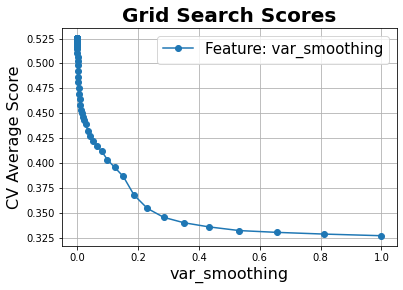

In [ ]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# Calling Method 
plot_grid_search(naive_bayes_classifier.cv_results_, np.logspace(0,-9, num=100), ['var_smoothing'], 'var_smoothing', 'Feature')

In [ ]:
# Melhor valor de 'var_smoothing' gerado pelo GridSearch
print(naive_bayes_classifier.best_params_)

{'var_smoothing': 2.848035868435799e-07}


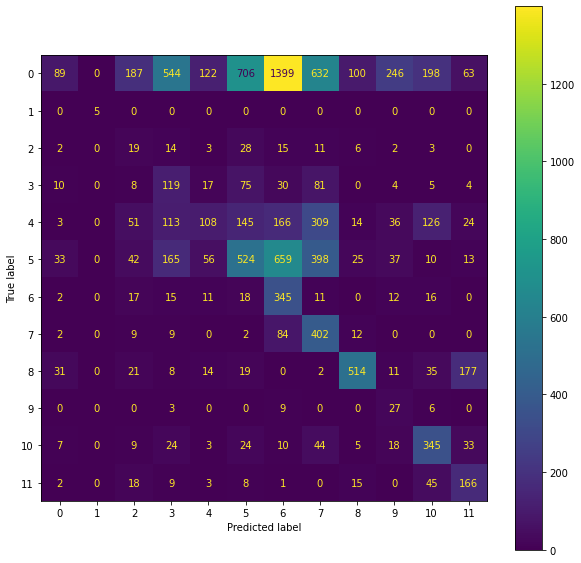

In [ ]:
naive_bayes_prediction = naive_bayes_classifier.predict(x_test)
cm = confusion_matrix(y_test, naive_bayes_prediction, labels=naive_bayes_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes_classifier.classes_)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)

Vemos os dados bem esparços, isso mostra o enorme número de erros do modelo ao tentar prever os dados do conjunto de teste.

In [ ]:
print(classification_report(y_test, naive_bayes_prediction, target_names=target_names))

              precision    recall  f1-score   support

           A       0.49      0.02      0.04      4286
           B       1.00      1.00      1.00         5
           C       0.05      0.18      0.08       103
           D       0.12      0.34      0.17       353
           E       0.32      0.10      0.15      1095
           F       0.34      0.27      0.30      1962
           G       0.13      0.77      0.22       447
           H       0.21      0.77      0.33       520
           I       0.74      0.62      0.67       832
           W       0.07      0.60      0.12        45
           X       0.44      0.66      0.53       522
           Y       0.35      0.62      0.44       267

    accuracy                           0.26     10437
   macro avg       0.35      0.50      0.34     10437
weighted avg       0.41      0.26      0.21     10437



Para o primeiro resultado já era o esperado. O modelo não consegue lidar bem com atributos que possuem alta dependencia mútua. Como já explicitado na descrição dos atributos, eles são basicamente relacionados à estrutura textual, o que apresenta uma alta dependencia entre os diferentes atributos.

Além disso, como utilizamos a ferramenta GridSearch para o auxílio da otimização de hiperparâmetros, provavelmente essa já é a melhor construção para o atual estado do dataset.